In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [2]:
df = pd.read_csv(r'../data/Fraud.csv')

In [3]:
df.loc[df.nameDest.str.startswith("C")].isFraud.value_counts()

0    4202912
1       8213
Name: isFraud, dtype: int64

In [4]:
df.loc[df.nameDest.str.startswith("M")].isFraud.value_counts()

0    2151495
Name: isFraud, dtype: int64

In [5]:
df.isFlaggedFraud.value_counts()
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [6]:
df.loc[df.nameDest.str.startswith("M")].isFlaggedFraud.value_counts()

0    2151495
Name: isFlaggedFraud, dtype: int64

In [7]:
df.loc[df.isFlaggedFraud == 1].isFraud.value_counts()

1    16
Name: isFraud, dtype: int64

In [8]:
df.loc[df.isFraud == 1].isFlaggedFraud.value_counts()

0    8197
1      16
Name: isFlaggedFraud, dtype: int64

In [9]:
df.loc[df.isFraud == 0].nameDest.value_counts().sort_values().index[2710000]

'C54400544'

In [10]:
df.loc[df.nameDest == 'C248609774']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0
197,1,CASH_OUT,82691.56,C1620409359,0.00,0.00,C248609774,657983.89,6453430.91,0,0
372,1,TRANSFER,438437.09,C977160959,0.00,0.00,C248609774,740675.45,6453430.91,0,0
383,1,TRANSFER,955855.00,C94830685,0.00,0.00,C248609774,1179112.54,6453430.91,0,0
802,1,TRANSFER,969631.31,C2144067911,0.00,0.00,C248609774,2134967.54,6453430.91,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4476709,324,CASH_IN,281867.16,C1483653893,4165861.47,4447728.63,C248609774,26726346.35,26444479.20,0,0
4748477,333,TRANSFER,707741.52,C1489120585,0.00,0.00,C248609774,26444479.20,27152220.72,0,0
5118049,356,CASH_IN,20470.18,C211118418,55073.00,75543.18,C248609774,27152220.72,27131750.54,0,0
5404769,377,CASH_IN,173399.60,C1684616792,11112856.30,11286255.90,C248609774,27131750.54,26958350.93,0,0


In [11]:
744/24

31.0

In [12]:
df.loc[df.nameDest.str.startswith("C"), 'CorM'] = 'C'

In [13]:
df.loc[df.nameDest.str.startswith("M"), 'CorM'] = 'M'

In [14]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CorM
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,M
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,M
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,C
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,M
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,M
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,M
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,M
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,M
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,C


In [15]:
df.groupby(by='CorM').isFraud.agg('sum')

CorM
C    8213
M       0
Name: isFraud, dtype: int64

In [16]:
df.loc[(df.isFraud == 1) & (df.type == "CASH_OUT")].amount.max()

10000000.0

In [17]:
df.loc[(df.isFlaggedFraud == 0)].sort_values(by='amount', ascending=False)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CorM
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9.595980e+03,9.245511e+07,0,0,C
4060598,300,TRANSFER,73823490.36,C2127282686,0.0,0.0,C753026640,9.362401e+07,1.674475e+08,0,0,C
4146397,303,TRANSFER,71172480.42,C2044643633,0.0,0.0,C84111522,1.134615e+08,1.846340e+08,0,0,C
3946920,286,TRANSFER,69886731.30,C1425667947,0.0,0.0,C167875008,1.515387e+08,2.214254e+08,0,0,C
3911956,284,TRANSFER,69337316.27,C1584456031,0.0,0.0,C1472140329,1.130072e+08,1.823446e+08,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
6281485,646,CASH_OUT,0.00,C1997645312,0.0,0.0,C601248796,0.000000e+00,0.000000e+00,1,0,C
6362463,730,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.000000e+00,0.000000e+00,1,0,C
6205440,586,CASH_OUT,0.00,C1303719003,0.0,0.0,C900608348,1.328473e+06,1.328473e+06,1,0,C
3760289,279,CASH_OUT,0.00,C539112012,0.0,0.0,C1106468520,5.385476e+05,5.385476e+05,1,0,C


In [18]:
df.loc[(df.isFraud == 1)].sort_values(by='amount', ascending=False)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CorM
3760283,279,CASH_OUT,10000000.0,C1214015158,10000000.00,0.00,C2110157840,0.00,10000000.00,1,0,C
5987587,409,CASH_OUT,10000000.0,C97242201,10000000.00,0.00,C786701128,8496.86,10008496.86,1,0,C
1707592,160,CASH_OUT,10000000.0,C525906402,10000000.00,0.00,C43869769,2145275.47,12145275.47,1,0,C
1707591,160,TRANSFER,10000000.0,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1,0,C
1707590,160,CASH_OUT,10000000.0,C2068007279,10000000.00,0.00,C836488544,158643.25,10158643.25,1,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
5996410,425,CASH_OUT,0.0,C69493310,0.00,0.00,C719711728,2921531.34,2921531.34,1,0,C
5996408,425,CASH_OUT,0.0,C832555372,0.00,0.00,C1462759334,76759.90,76759.90,1,0,C
6362461,730,CASH_OUT,0.0,C729003789,0.00,0.00,C1388096959,1008609.53,1008609.53,1,0,C
6362463,730,CASH_OUT,0.0,C2088151490,0.00,0.00,C1156763710,0.00,0.00,1,0,C


In [19]:
df.loc[df.isFraud == 1].nameDest.value_counts().sort_values(ascending=False).head(20)

C1193568854    2
C1399829166    2
C1980653895    2
C1460854172    2
C964377943     2
C686334805     2
C1656842502    2
C967226405     2
C1780714769    2
C385133759     2
C1650668671    2
C185805228     2
C475338087     2
C1981613973    2
C643624257     2
C1259079602    2
C410033330     2
C105660024     2
C1827800010    2
C650699445     2
Name: nameDest, dtype: int64

In [20]:
df.loc[df.nameDest == 'C1399829166']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CorM
267178,15,CASH_IN,209466.03,C1322020137,58500.00,267966.03,C1399829166,0.00,0.00,0,0,C
450071,19,CASH_OUT,130199.97,C793691431,642410.41,512210.44,C1399829166,0.00,130199.97,0,0,C
574752,25,CASH_OUT,93249.37,C1199923520,0.00,0.00,C1399829166,130199.97,223449.34,0,0,C
637939,35,CASH_IN,205053.56,C273083085,4135128.59,4340182.15,C1399829166,223449.34,18395.78,0,0,C
693110,36,CASH_IN,15836.76,C943076972,2365603.18,2381439.94,C1399829166,18395.78,2559.02,0,0,C
906533,43,CASH_OUT,32851.60,C1747186080,30431.00,0.00,C1399829166,2559.02,35410.62,0,0,C
1519503,153,CASH_OUT,21993.86,C1603486631,11330.00,0.00,C1399829166,35410.62,57404.49,0,0,C
1732982,161,CASH_OUT,42632.13,C975370822,23694.29,0.00,C1399829166,57404.49,100036.62,0,0,C
1946639,177,TRANSFER,315297.90,C87157073,20875.00,0.00,C1399829166,100036.62,415334.52,0,0,C
2043826,181,CASH_OUT,243138.07,C425512193,0.00,0.00,C1399829166,415334.52,658472.58,0,0,C


In [21]:
columns_titles = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'CorM', 'isFlaggedFraud', 'isFraud']
df=df.reindex(columns=columns_titles)


In [22]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,CorM,isFlaggedFraud,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,M,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,M,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,C,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,C,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,M,0,0


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_enc = LabelEncoder()
df['type'] = label_enc.fit_transform(df['type'])
df['CorM'] = label_enc.fit_transform(df['CorM'])
df.nameOrig = df.nameOrig.str[1:]
df.nameDest = df.nameDest.str[1:]

In [25]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,CorM,isFlaggedFraud,isFraud
0,1,3,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,1,0,0
1,1,3,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,1,0,0
2,1,4,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,0,0,1
3,1,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,0,0,1
4,1,3,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,1,0,0


In [26]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from skopt import gp_minimize
from skopt.plots import plot_convergence

from imblearn.under_sampling import NearMiss

from collections import Counter
import joblib


In [28]:
y = df["isFraud"] # target 
X = df.iloc[:,0:10]

nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X, y)
# Check the number of records after over sampling
print(sorted(Counter(y_train_nearmiss).items()))


[(0, 8213), (1, 8213)]


In [29]:
x_train, x_test_val, y_train, y_test_val = train_test_split(X_train_nearmiss, y_train_nearmiss, test_size = .3, 
                                                            stratify = y_train_nearmiss, random_state = 42)

In [30]:
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size = .3, stratify = y_test_val,
                                               random_state = 42)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1724
           1       0.99      1.00      0.99      1725

    accuracy                           0.99      3449
   macro avg       0.99      0.99      0.99      3449
weighted avg       0.99      0.99      0.99      3449

ROC AUC: 0.999543
AUPRC: 0.999598
Iteration No: 1 started. Evaluating function at random point.

 [0.03918194347141743, 10, 0.7429095402564033, 0.5710391484696978, 229, 13]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.6063
Function value obtained: -0.9990
Current minimum: -0.9990
Iteration No: 2 started. Evaluating function at random point.

 [0.008288916866885144, 17, 0.14429480884662435, 0.6218351645719218, 31, 87]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1882
Function value obtained: -0.9534
Current minimum: -0.9990
Iteration No: 3 started. Evaluating function at random point.

 [0.07535384509295551, 1, 0.942

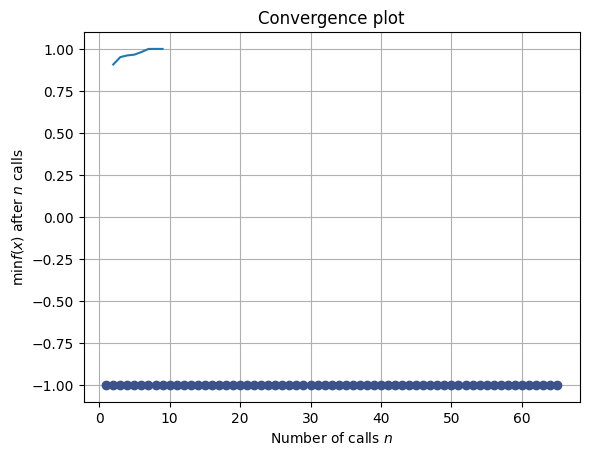

In [35]:
baseline_xgb_pipeline = Pipeline([("scaler", MaxAbsScaler()),
                                  ("gb", XGBClassifier(random_state = 42))
                                 ])
baseline_xgb_pipeline.fit(x_train, y_train)

y_pred = baseline_xgb_pipeline.predict(x_test)
print(classification_report(y_test, y_pred))

y_pred_prob = baseline_xgb_pipeline.predict_proba(x_test)[:,1]
print("ROC AUC: %f"%(roc_auc_score(y_test, y_pred_prob)))
print("AUPRC: %f"%(average_precision_score(y_test, y_pred_prob)))

# Optimize
def create_xgb(params):
    learning_rate = params[0]
    max_depth = params[1]
    subsample = params[2]
    colsample_bytree = params[3]
    max_leaves = params[4]
    min_child_weight = params[5]
    
    xgb_pipeline =  Pipeline([("scaler", MaxAbsScaler()),
                     ("gb", XGBClassifier(random_state = 42, 
                                          learning_rate = learning_rate, 
                                          max_depth = max_depth, 
                                          subsample = subsample,
                                          colsample_bytree = colsample_bytree,
                                          max_leaves = max_leaves, 
                                          min_child_weight = min_child_weight))
                    ])
    
    return xgb_pipeline

def train_xgb(params):
    print("\n", params)
    
    xgb_pipeline = create_xgb(params)
    
    xgb_pipeline.fit(x_train, y_train)
    
    y_percs = xgb_pipeline.predict_proba(x_test)[:,1]
    
    return -roc_auc_score(y_test, y_percs)
    
params = [(1e-3, 1e-1, "log-uniform"), #learning_rate
          (1, 50), #max_depth
          (0.01, .95), #subsample
          (0.01, .95), #colsample_bytree
          (2, 512), #max_leaves
          (1, 120) #min_child_weight
         ]

gp_xgb = gp_minimize(train_xgb, params, verbose = 1, n_calls = 65, n_random_starts = 15, random_state = 42)
print(gp_xgb.x)
plot_convergence(gp_xgb)

# Select variables
k_scores = []
for k in range(2, 10):
    selector = SelectKBest(f_classif, k = k)
    
    x_train_selected = selector.fit_transform(x_train, y_train)
    x_test_selected = selector.transform(x_test)
    
    xgb_pipeline_selected = create_xgb(gp_xgb.x)
    xgb_pipeline_selected.fit(x_train_selected, y_train)
    
    y_percs_selected = xgb_pipeline_selected.predict_proba(x_test_selected)[:,1]
    
    roc_score = roc_auc_score(y_test, y_percs_selected)
    k_scores.append(roc_score)
    
    print("K = %i -> ROC AUC %f"%(k, roc_score))

ind = k_scores.index(max(k_scores))
opt_k = 2 + ind
print("Max score = %f; K = %i"%(k_scores[ind], opt_k))

sns.lineplot(x = range(2, 10), y = k_scores)
selector_xgb = SelectKBest(f_classif, k = opt_k)
x_train_xgb = selector_xgb.fit_transform(x_train, y_train)


In [39]:
selector_xgb.get_support()

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True])

In [37]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,CorM,isFlaggedFraud,isFraud
0,1,3,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,1,0,0
1,1,3,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,1,0,0
2,1,4,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,0,0,1
3,1,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,0,0,1
4,1,3,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,1,0,0


In [40]:
df_xgb = df.drop(columns=["isFraud", 'isFlaggedFraud']).iloc[:, selector_xgb.get_support()]

print("Removed cols ->", set(df.columns) - set(df_xgb.columns))
df_xgb.head()

Removed cols -> {'isFlaggedFraud', 'nameOrig', 'nameDest', 'isFraud'}


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CorM
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,1
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,1
2,1,4,181.00,181.0,0.00,0.0,0.0,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,1


In [42]:
# Opt XGBoost model
x_test_xgb = selector_xgb.transform(x_test)
x_val_xgb = selector_xgb.transform(x_val)
    
opt_xgb_pipeline = create_xgb(gp_xgb.x)
opt_xgb_pipeline.fit(x_train_xgb, y_train)

Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('gb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.95,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=35, max_leaves=2, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, ...))])

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1724
           1       0.99      1.00      1.00      1725

    accuracy                           1.00      3449
   macro avg       1.00      1.00      1.00      3449
weighted avg       1.00      1.00      1.00      3449

ROC AUC: 0.999777
AUPRC: 0.999783


<AxesSubplot: >

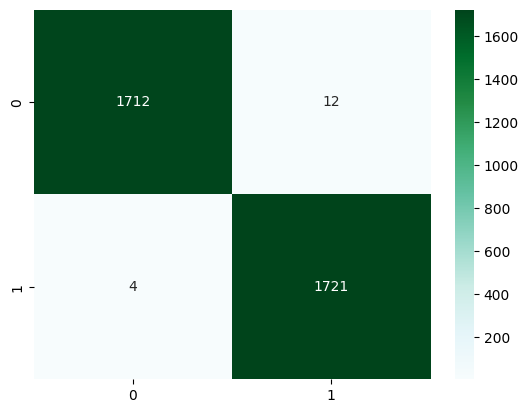

In [43]:
# Testing model
y_pred = opt_xgb_pipeline.predict(x_test_xgb)
print(classification_report(y_test, y_pred))

y_pred_prob = opt_xgb_pipeline.predict_proba(x_test_xgb)[:,1]
print("ROC AUC: %f"%(roc_auc_score(y_test, y_pred_prob)))
print("AUPRC: %f"%(average_precision_score(y_test, y_pred_prob)))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap = "BuGn")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1479
   macro avg       1.00      1.00      1.00      1479
weighted avg       1.00      1.00      1.00      1479

ROC AUC: 0.999779
AUPRC: 0.999777


<AxesSubplot: >

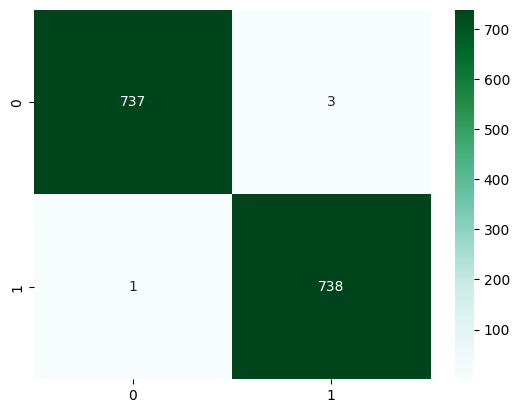

In [44]:
# Validating model
y_pred = opt_xgb_pipeline.predict(x_val_xgb)
print(classification_report(y_val, y_pred))

y_pred_prob = opt_xgb_pipeline.predict_proba(x_val_xgb)[:,1]
print("ROC AUC: %f"%(roc_auc_score(y_val, y_pred_prob)))
print("AUPRC: %f"%(average_precision_score(y_val, y_pred_prob)))

sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap = "BuGn")

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   6354407
           1       0.13      1.00      0.22      8213

    accuracy                           0.99   6362620
   macro avg       0.56      0.99      0.61   6362620
weighted avg       1.00      0.99      0.99   6362620

ROC AUC: 0.999774
AUPRC: 0.930583


<AxesSubplot: >

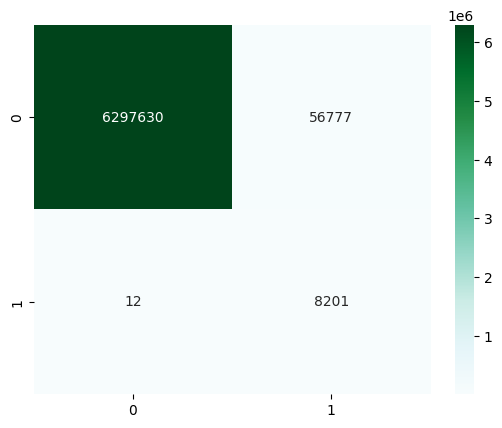

In [46]:
X = selector_xgb.transform(X)

y_pred = opt_xgb_pipeline.predict(X)
print(classification_report(y, y_pred))

y_pred_prob = opt_xgb_pipeline.predict_proba(X)[:,1]
print("ROC AUC: %f"%(roc_auc_score(y, y_pred_prob)))
print("AUPRC: %f"%(average_precision_score(y, y_pred_prob)))

sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap = "BuGn")

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)


In [ ]:
from imblearn.pipeline import make_pipeline ## Create a Pipeline using the provided estimators .
from imblearn.under_sampling import NearMiss  ## perform Under-sampling  based on NearMiss methods. 
from imblearn.over_sampling import SMOTE  ## PerformOver-sampling class that uses SMOTE. 
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_nearmiss, y_train_nearmiss)
    training_score = cross_val_score(classifier, X_train_nearmiss, y_train_nearmiss, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
